In [2]:
import pandas as pd
import matplotlib.pyplot as plt
def getDF(path,model_name):
    loss = pd.read_csv(path+model_name+'/loss.tsv',sep='\t')
    if loss.columns[0]!= 'EPOCH':
        loss = pd.read_csv(path+model_name+'/loss.tsv',sep='\t',header=None)
        loss.columns = ['EPOCH', 'TIMESTAMP', 'BAD_EPOCHS', 'LEARNING_RATE', 'TRAIN_LOSS', 'DEV_LOSS', 'DEV_PRECISION', 'DEV_RECALL', 'DEV_F1']
    loss.set_index('EPOCH',inplace=True)
    
    return loss

def Plotter(loss,model_name):

    fig, ax1 = plt.subplots(figsize=[10,5])
    ax1.plot(loss.DEV_LOSS,label='DEV_LOSS');ax1.plot(loss.TRAIN_LOSS,label='TRAIN_LOSS')
    ax2 = ax1.twinx() 
    ax2.plot(loss.DEV_F1,color = 'black',label='DEV_F1_Score')

    ax1.set_ylabel('LOSS'); ax2.set_ylabel('F1 Score')
    ax1.legend(loc = 8);ax2.legend(loc = 7)
    ax1.set_xlabel('Epoches')

    ax1.set_title(model_name); ax1.grid(ls='--')

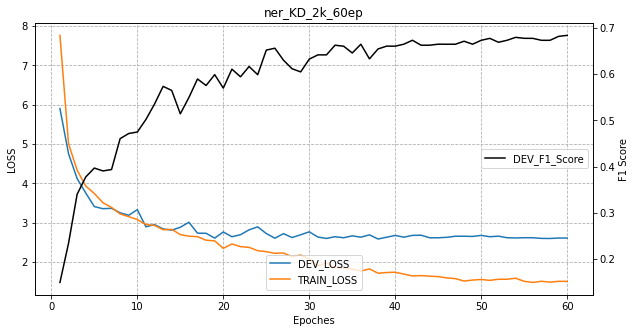

In [135]:
path = '/Users/Wu/Downloads/resources/taggers/';model_name = 'ner_KD_2k_60ep'
loss = getDF(path,model_name)
Plotter(loss,model_name)

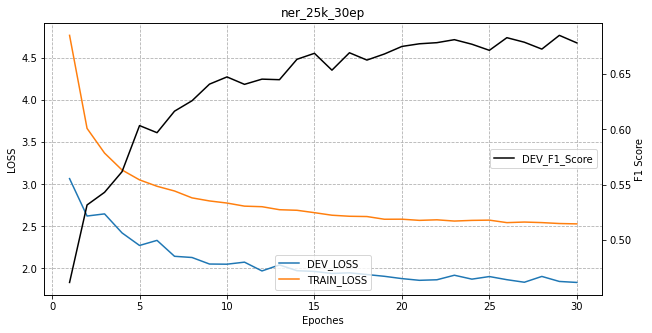

In [138]:
path = '/Users/Wu/Downloads/resources/taggers/';model_name = 'ner_25k_30ep'
loss = getDF(path,model_name)
Plotter(loss,model_name)

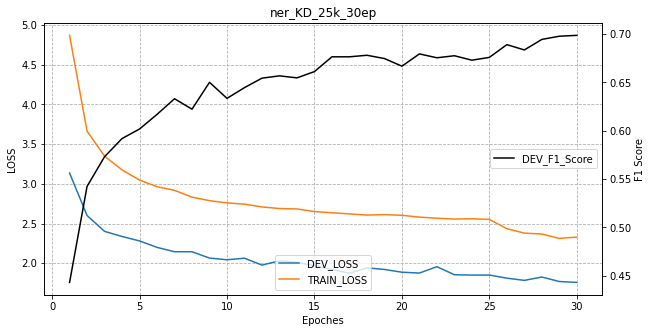

In [140]:
# concatenate continuously trained model's loss.tsv
loss1 = pd.read_csv('/Users/Wu/Downloads/resources/taggers/ner_KD_25k_5ep/loss.tsv',sep='\t')
loss2 = pd.read_csv('/Users/Wu/Downloads/resources/taggers/ner_KD_25k_30ep/loss.tsv',sep='\t',header=None)
loss2.columns = loss1.columns
loss = pd.concat([loss1,loss2])
loss.set_index('EPOCH',inplace=True)
model_name = 'ner_KD_25k_30ep'
Plotter(loss,model_name)

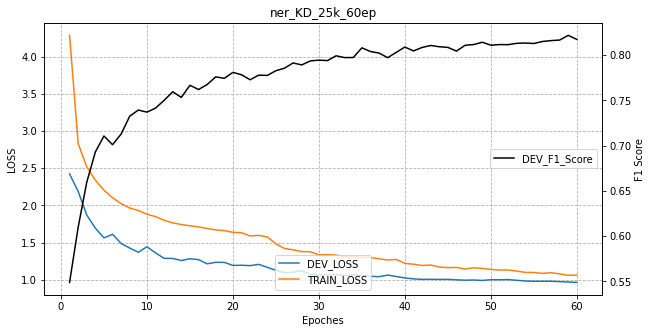

In [4]:
# concatenate continuously trained model's loss.tsv
loss1 = pd.read_csv('/Users/Wu/Downloads/resources/taggers/ner_KD_char_25k_8ep/loss.tsv',sep='\t')
loss2 = pd.read_csv('/Users/Wu/Downloads/resources/taggers/ner_KD_char_25k_30ep/loss.tsv',sep='\t',header=None)
loss3 = pd.read_csv('/Users/Wu/Downloads/resources/taggers/ner_KD_char_25k_60ep/loss.tsv',sep='\t',header=None)
loss2.columns = loss1.columns;loss3.columns = loss1.columns
loss = pd.concat([loss1,loss2,loss3])
loss.set_index('EPOCH',inplace=True)
model_name = 'ner_KD_25k_60ep'
Plotter(loss,model_name)